<a href="https://colab.research.google.com/github/ChaaruVijay/DSPL-CourseWork/blob/main/KNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#Read in the data using pandas
df = pd.read_csv('/content/train_cleaned.csv')
#Check a sample of the dataset
df.head()

,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,11,1209.60,756.00,5292.00,4.0
1,13,1590.12,1060.08,6007.12,1.0
2,19,2288.88,1481.04,9155.52,4.0
3,19,2274.94,1739.66,9099.76,4.0
4,11,2345.49,2069.55,9243.99,4.0


In [2]:
#list out columns of the dataset
list(df.columns)

['outlet_city', 'luxury_sales', 'fresh_sales', 'dry_sales', 'cluster_catgeory']

In [3]:
#check the number of rows and columns in the dataset
df.shape

(774055, 5)

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
outlet_city,774055.0,9.382101,5.778086,0.0,4.00,9.00,14.00,19.00
luxury_sales,774055.0,1921.943569,1004.033025,500.0,1213.53,1715.28,2338.69,6999.65
fresh_sales,774055.0,4428.711418,3334.708075,500.0,1620.19,3356.51,6671.70,13997.90
dry_sales,774055.0,4676.276166,3409.399478,500.0,1787.94,3727.76,7162.20,13999.30
cluster_catgeory,774055.0,3.292130,1.867030,1.0,2.00,3.00,5.00,6.00


In [5]:
# To expand e scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
outlet_city,774055.00,9.38,5.78,0.00,4.00,9.00,14.00,19.00
luxury_sales,774055.00,1921.94,1004.03,500.00,1213.53,1715.28,2338.69,6999.65
fresh_sales,774055.00,4428.71,3334.71,500.00,1620.19,3356.51,6671.70,13997.90
dry_sales,774055.00,4676.28,3409.40,500.00,1787.94,3727.76,7162.20,13999.30
cluster_catgeory,774055.00,3.29,1.87,1.00,2.00,3.00,5.00,6.00


In [7]:
#define feature and target
X = df[['luxury_sales', 'fresh_sales', 'dry_sales']]
y = df['cluster_catgeory']

In [8]:
#check that the list of target variable
y.head()

,cluster_catgeory
0,4.00
1,1.00
2,4.00
3,4.00
4,4.00


In [9]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14, stratify=y)

#This is to show the number of instances and input features in the training and test sets
print('X_train Instances', X_train.shape)
print('X_test Instances', X_test.shape)

X_train Instances (619244, 3)
X_test Instances (154811, 3)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
#Perform predictions on the test data
y_pred=knn.predict(X_test)

#Create a dataframe for comparing the actual vs predicted results by kNN mode
compare_results_knn_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
compare_results_knn_df

,Actual,Predicted
159789,4.00,4.00
375349,1.00,1.00
118437,4.00,4.00
371430,1.00,1.00
189096,2.00,2.00
...,...,...
731322,3.00,5.00
89374,4.00,4.00
425917,1.00,1.00
246413,2.00,2.00


In [12]:
#evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     37792
         2.0       1.00      1.00      1.00     31010
         3.0       0.64      0.62      0.63      9778
         4.0       1.00      1.00      1.00     34485
         5.0       0.55      0.57      0.56      7905
         6.0       1.00      1.00      1.00     33841

    accuracy                           0.95    154811
   macro avg       0.86      0.86      0.86    154811
weighted avg       0.95      0.95      0.95    154811



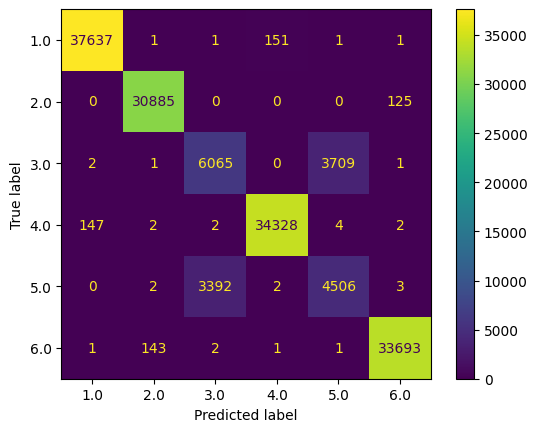

In [13]:
#Import the packages for costructing the confusion matrix
from sklearn.metrics import confusion_matrix
#Import the packages for plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Costruct the confusion matrix based on…
#comparing actual values (y_test) vs predicted (y_pred) in test data
cm_knn = confusion_matrix(y_test, y_pred, labels = knn.classes_)
#Plot the confusion matrix
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
disp_knn_cm.plot()

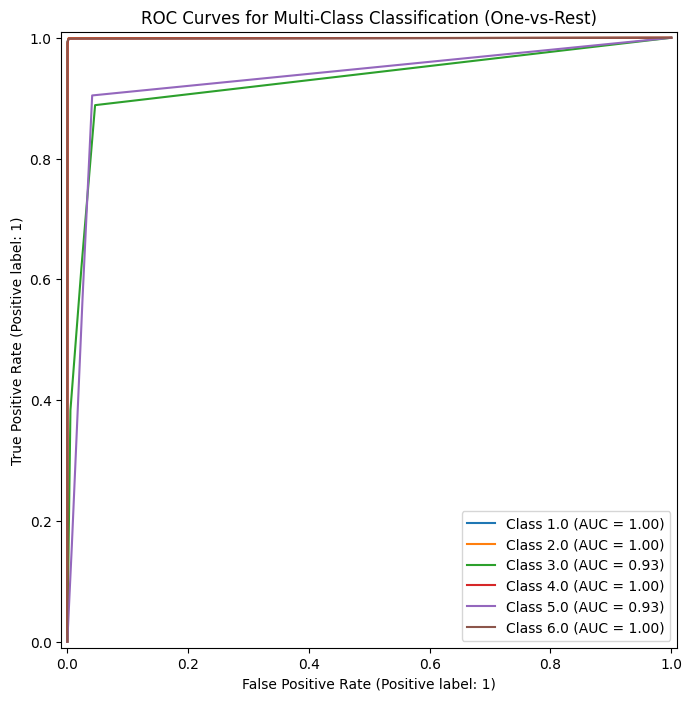

In [14]:
!pip install scikit-learn

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier # Import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
# Assuming you already have X_train, X_test, y_train, y_test

# Binarize the labels for multi-class ROC
y_train_bin = label_binarize(y_train, classes=knn.classes_)
y_test_bin = label_binarize(y_test, classes=knn.classes_)

# Create a OneVsRestClassifier with your KNN classifier
knn_ovr = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))

# Fit the classifier to the data
knn_ovr.fit(X_train, y_train_bin)


# Plot ROC curves for each class
fig, ax = plt.subplots(figsize=(10, 8))
for i, class_label in enumerate(knn.classes_):
    RocCurveDisplay.from_estimator(
        knn_ovr.estimators_[i],  # Access individual binary classifiers
        X_test,
        y_test_bin[:, i],  # Use binarized labels for each class
        ax=ax,
        name=f"Class {class_label}",
       )

ax.set_title("ROC Curves for Multi-Class Classification (One-vs-Rest)")
ax.legend(loc="lower right")

Text(0, 0.5, 'Mean Error')

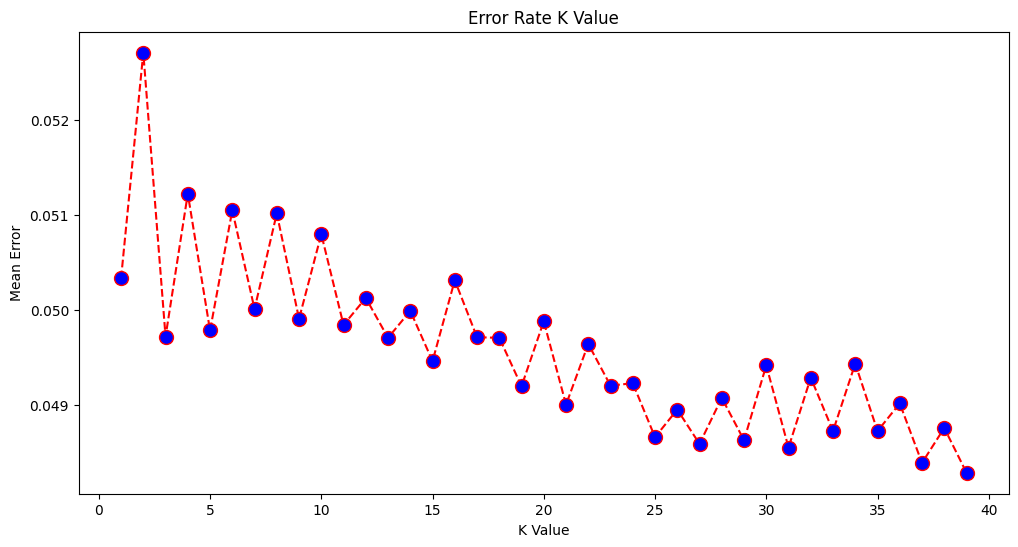

In [15]:
# Calculating error for K values between 1 and 40
from sklearn.neighbors import KNeighborsClassifier
error = []
import numpy as np
import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    pred_i = knn2.predict(X_test) #This was outside the loop and is now indented
    error.append(np.mean(pred_i != y_test)) #This was outside the loop and is now indented

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [16]:
# Create KNN classifier
knn1 = KNeighborsClassifier(n_neighbors = 1)
# Fit the classifier to the data
knn1.fit(X_train,y_train)
#Perform predictions on the test data
y_pred=knn1.predict(X_test)

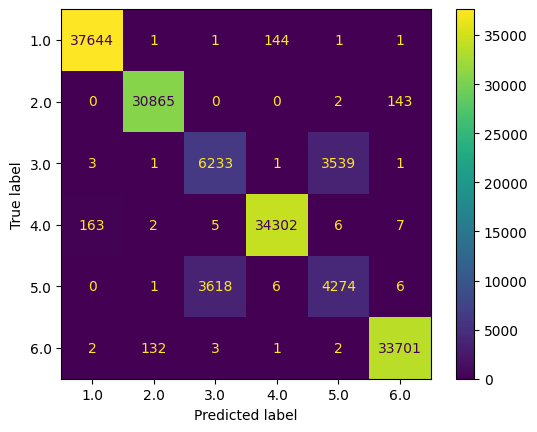

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_knn1 = confusion_matrix(y_test, y_pred, labels = knn1.classes_)
disp_knn1_cm = ConfusionMatrixDisplay(cm_knn1, display_labels=knn1.classes_)
disp_knn1_cm.plot()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     37792
         2.0       1.00      1.00      1.00     31010
         3.0       0.63      0.64      0.63      9778
         4.0       1.00      0.99      1.00     34485
         5.0       0.55      0.54      0.54      7905
         6.0       1.00      1.00      1.00     33841

    accuracy                           0.95    154811
   macro avg       0.86      0.86      0.86    154811
weighted avg       0.95      0.95      0.95    154811



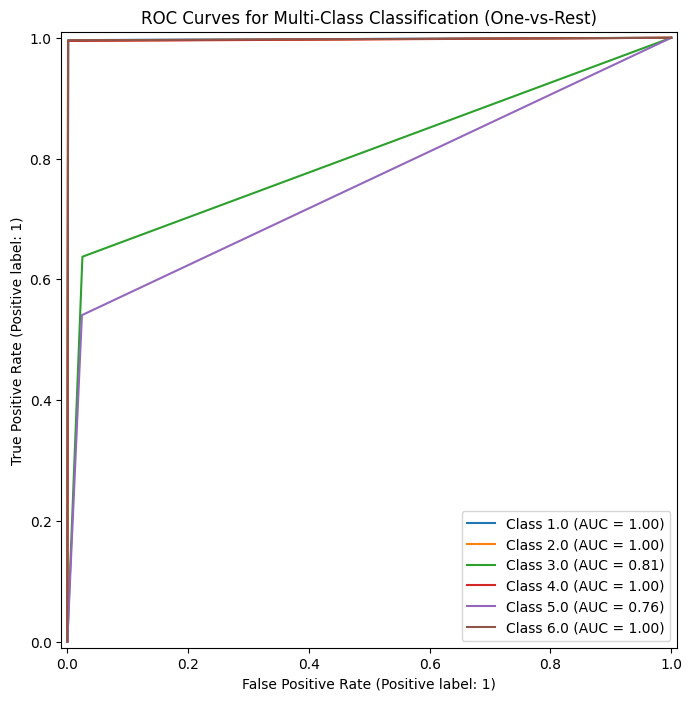

In [20]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier # Import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
# Assuming you already have X_train, X_test, y_train, y_test

# Binarize the labels for multi-class ROC
y_train_bin = label_binarize(y_train, classes=knn1.classes_)
y_test_bin = label_binarize(y_test, classes=knn1.classes_)

# Create a OneVsRestClassifier with your KNN classifier
knn_ovr = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=1)) #Using knn1 as the base classifier

# Fit the classifier to the data
knn_ovr.fit(X_train, y_train_bin)


# Plot ROC curves for each class
fig, ax = plt.subplots(figsize=(10, 8))
for i, class_label in enumerate(knn1.classes_):
    RocCurveDisplay.from_estimator(
        knn_ovr.estimators_[i],  # Access individual binary classifiers
        X_test,
        y_test_bin[:, i],  # Use binarized labels for each class
        ax=ax,
        name=f"Class {class_label}",
       )

ax.set_title("ROC Curves for Multi-Class Classification (One-vs-Rest)")
ax.legend(loc="lower right")

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Encode categorical target variable (if necessary)
le = LabelEncoder()
df['cluster_catgeory'] = le.fit_transform(df['cluster_catgeory'])  # Convert to numerical labels

# Define features (X) and target (y)
X = df[['luxury_sales', 'fresh_sales', 'dry_sales']]
y = df['cluster_catgeory']

# Standardise feature values (KNN performs better with scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create new KNN model
knn = KNeighborsClassifier()

# Create a dictionary of all values to test for n_neighbors and distance metrics
param_grid = {'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan']}

# Use GridSearchCV to find the best parameters
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')

# Fit model to data
knn_gscv.fit(X_scaled, y)

# Best parameters and score
print("Best parameters:", knn_gscv.best_params_)
print("Best ROC AUC score:", knn_gscv.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/us

Best parameters: {'metric': 'euclidean', 'n_neighbors': np.int64(1)}
Best ROC AUC score: nan


In [24]:
# Check top performing n_neighbors’ value
knn_gscv.best_params_

{'metric': 'euclidean', 'n_neighbors': np.int64(1)}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00     37792
         2.0       0.00      0.00      0.00     31010
         3.0       0.00      0.00      0.00      9778
         4.0       0.00      0.00      0.00     34485
         5.0       0.00      0.00      0.00      7905
         6.0       0.00      0.00      0.00     33841

    accuracy                           0.00    154811
   macro avg       0.00      0.00      0.00    154811
weighted avg       0.00      0.00      0.00    154811



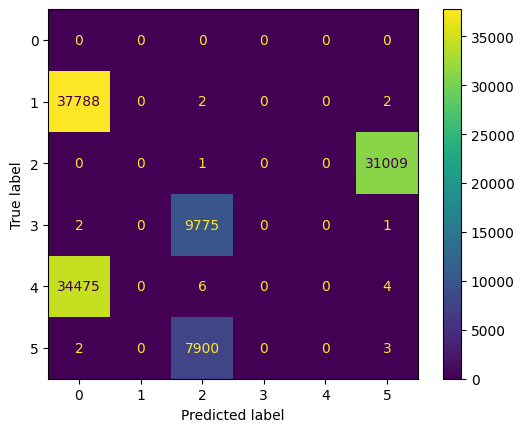

In [25]:
# Perform testing on test dataset
y_pred = knn_gscv.predict(X_test)
# Construct a confusion matrix
cm_knn_gscv = confusion_matrix(y_test, y_pred, labels = knn_gscv.classes_)
disp_knn_gscv_cm = ConfusionMatrixDisplay(cm_knn_gscv, display_labels=knn_gscv.classes_)
disp_knn_gscv_cm.plot()
# Display the classification report
print(classification_report(y_test, y_pred))

In [26]:
from sklearn.metrics import RocCurveDisplay
knn_gscv_roc = RocCurveDisplay.from_estimator(knn_gscv, X_test, y_test)

ValueError: Expected 'estimator' to be a binary classifier. Got 6 classes instead.